In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
class MyLogisticRegression:
  def __init__(self):
    self.intercept_ = None
    self.coef_ = None

  def sigmoid(self, x):
    return 1. / (1 + np.exp(-x))

  def grad(self, X, y, logistic):
    coef = y * (1 - self.sigmoid(y  * logistic))
    grads = - X * coef.reshape(-1, 1)
    grad = grads.mean(axis=0)
    return grad

  def fit(self, X, y, max_iter=100, lr=0.1):
    X = np.array(X)
    y = np.array(y)
    y = 2 * y - 1 # переводим в 1 -1

    X = np.hstack([np.ones([X.shape[0], 1]), X])
    l, n = X.shape

    weights = np.random.randn(n)

    losses = []

    for iter in range(max_iter):
      logits = (X @ weights.reshape(n, 1)).ravel()
      grad = self.grad(X, y, logits)
      weights -= grad * lr

      loss = np.mean(np.log(1 + np.exp(-y * logits)))
      losses.append(loss)

    self.coef_ = weights[1:]
    self.intercept_ = weights[0]

    return losses

  def predict_proba(self, X):
    # Принимает на вход X и возвращает ответы модели
    X = np.array(X)
    X = np.hstack([np.ones([X.shape[0], 1]), X])
    weights = np.concatenate([self.intercept_.reshape([1]), self.coef_])
    logits = (X @ weights.reshape(-1, 1))
    return self.sigmoid(logits)

  def predict(self, X, threshold=0.5):
      return self.predict_proba(X) >= threshold


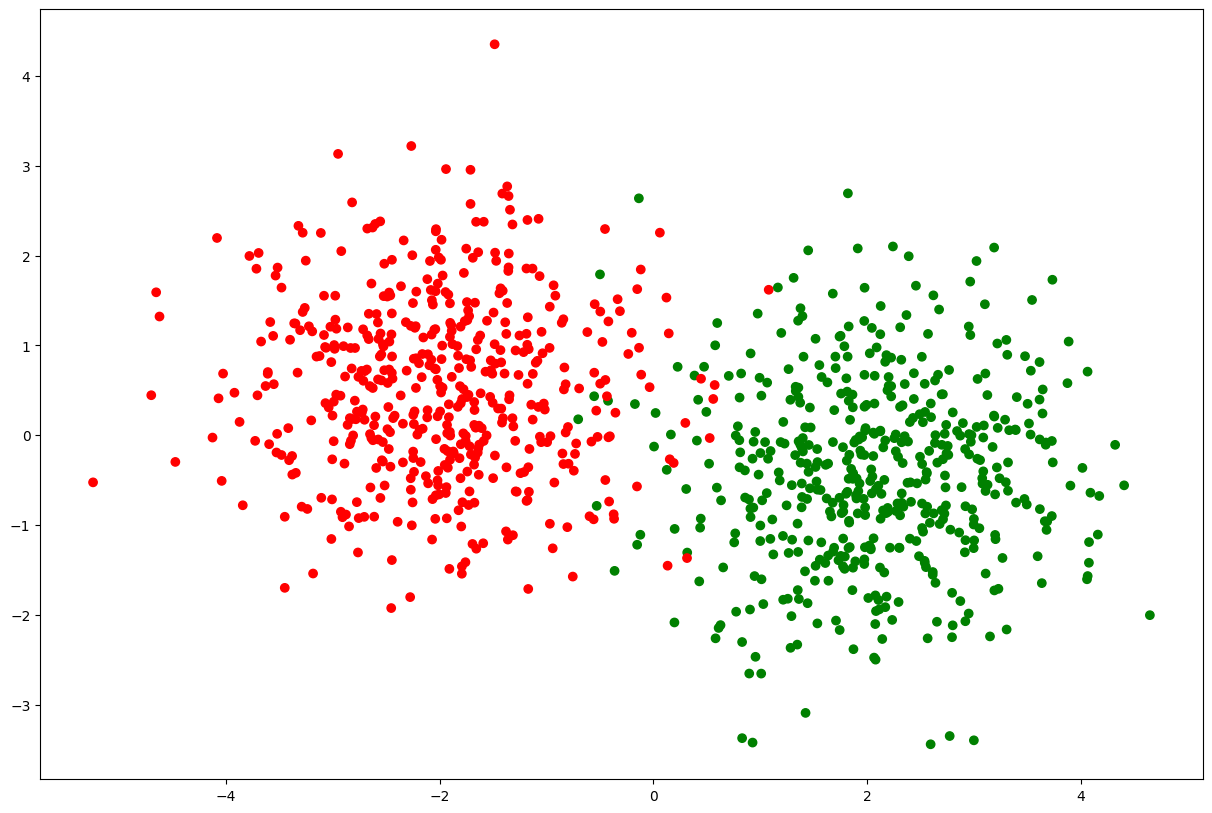

In [35]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=42)

colors = ('red', 'green')
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0, 1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [42]:
clf = MyLogisticRegression()

losses = clf.fit(X, y, max_iter=1000)

coef, intercept = clf.coef_, clf.intercept_

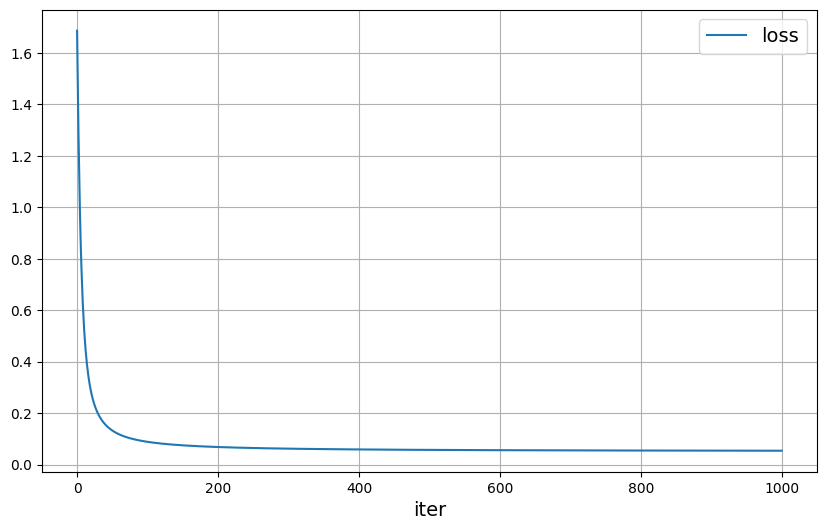

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(losses, label='loss')
plt.legend(fontsize=14)
plt.xlabel('iter', fontsize=14)
plt.grid()

In [38]:
coef, intercept

(array([ 3.12771353, -0.52083859]), -0.11331928592354981)

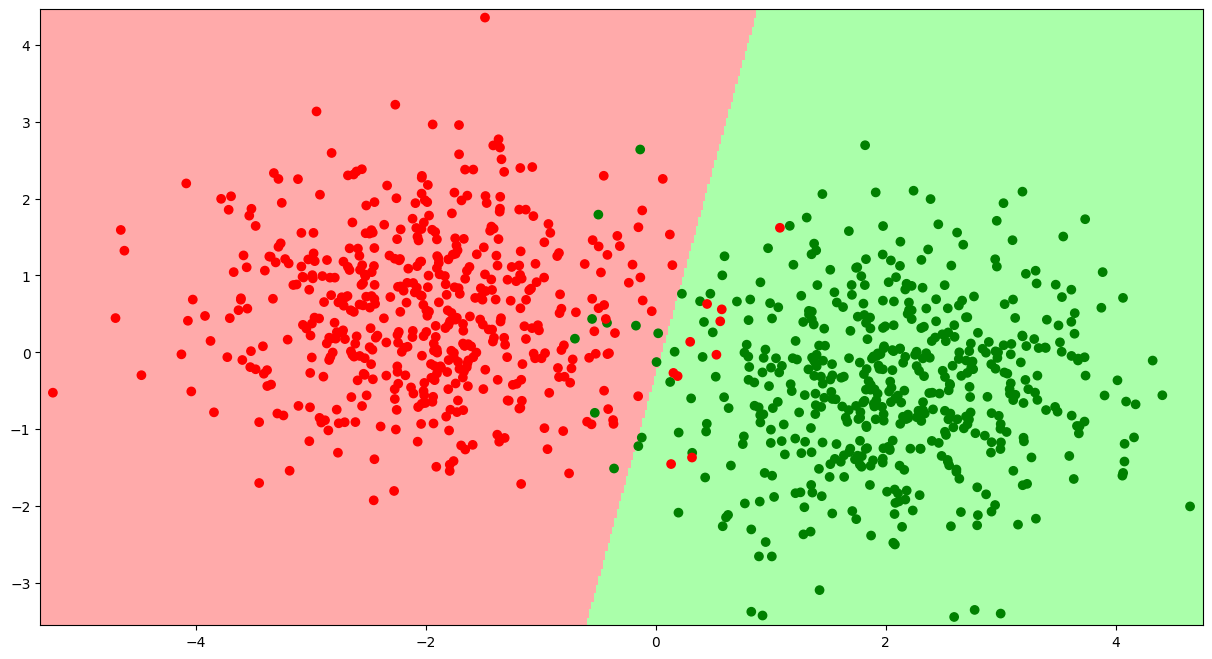

In [43]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

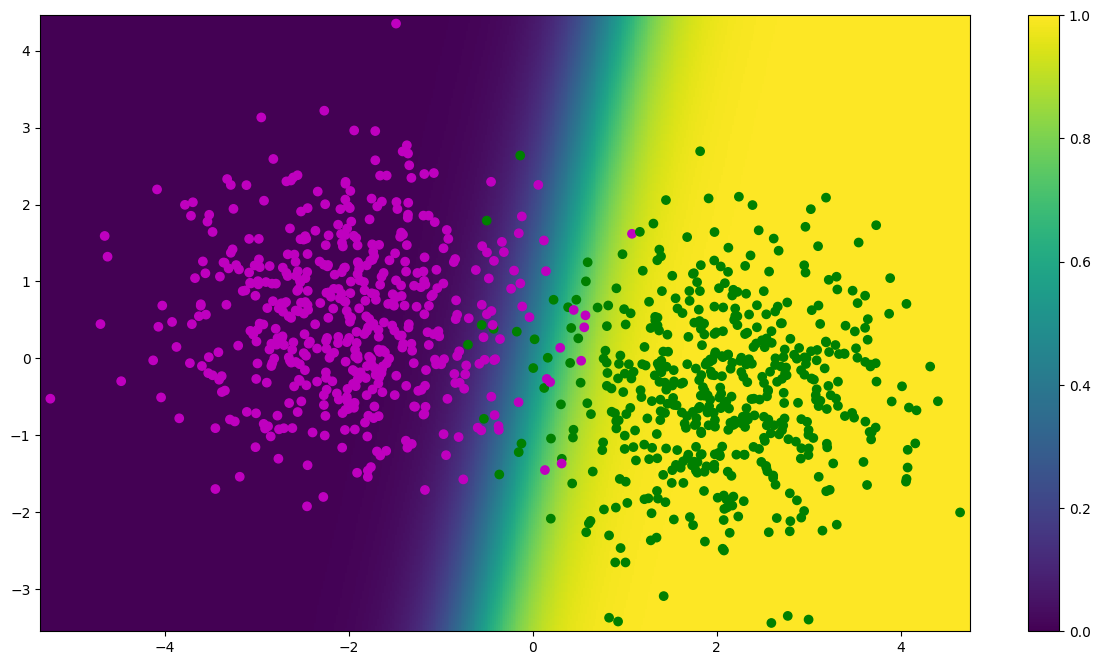

In [44]:
colors = ("magenta", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])


plt.figure(figsize=(15,8))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('viridis'))

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.colorbar()
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y, clf.predict_proba(X))

0.99838